In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 71% 47.0M/66.0M [00:00<00:00, 127MB/s]
100% 66.0M/66.0M [00:00<00:00, 164MB/s]


In [ ]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
from collections import Counter
import itertools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [ ]:
dataframe = pd.read_csv("creditcard.csv")
cols = dataframe.columns.to_list()
type(cols)
# cols
# dataframe.head(1)
# dataframe[dataframe.Class == 1].head(2).to_numpy()

list

In [ ]:
dataframe.isnull().values.any()

False

In [ ]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
def getDataDetails(dataframe):
  non_fraud = len(dataframe[dataframe.Class == 0])
  fraud = len(dataframe[dataframe.Class == 1])
  fraud_percent = (fraud / (fraud + non_fraud)) * 100
  print("Number of Genuine transactions: ", non_fraud)
  print("Number of Fraud transactions: ", fraud)
  print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))
  return {'non_fraud': non_fraud, 'fraud': fraud, 'fraud_percent': fraud_percent}

In [ ]:
details = getDataDetails(dataframe)

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


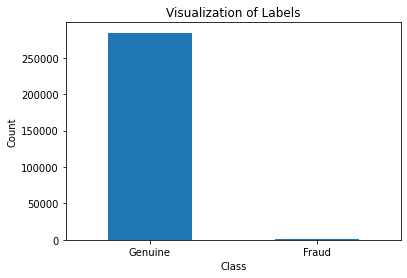

In [ ]:
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)
type(Y)

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Logistic regression
logistic_regression = linear_model.LogisticRegression(C=1e5, solver='lbfgs', max_iter=1000)

# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [ ]:
# Logistic regression
logistic_regression.fit(train_X, train_Y)
predictions_lr = logistic_regression.predict(test_X)
linear_regression_score = logistic_regression.score(test_X, test_Y)*100
print("Logistic regression Score: ", linear_regression_score)

# Decision Tree
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

# Random Forest
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

Logistic regression Score:  99.92626663389628
Decision Tree Score:  99.9133925541004
Random Forest Score:  99.95903701883127


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Logistic regression
confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr)
print("Confusion Matrix - Logistic regression")
print(confusion_matrix_lr)

Confusion Matrix - Logistic regression
[[85295    12]
 [   51    85]]


In [ ]:
print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_lr.round())

Evaluation of Logistic Regression Model

Accuracy: 0.99926
Precision: 0.87629
Recall: 0.62500
F1-score: 0.72961


In [ ]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85260    47]
 [   27   109]]


In [ ]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99913
Precision: 0.69872
Recall: 0.80147
F1-score: 0.74658


In [ ]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[85300     7]
 [   28   108]]


In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99959
Precision: 0.93913
Recall: 0.79412
F1-score: 0.86056


In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
(train_X2, test_X2, train_Y2, test_Y2) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [ ]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X2, train_Y2)
predictions_resampled = rf_resampled.predict(test_X2)
random_forest_score_resampled = rf_resampled.score(test_X2, test_Y2) * 100

In [ ]:
cm_resampled = confusion_matrix(test_Y2, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)
# plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

Confusion Matrix - Random Forest
[[85129    20]
 [    0 85440]]


In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y2, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99988
Precision: 0.99977
Recall: 1.00000
F1-score: 0.99988


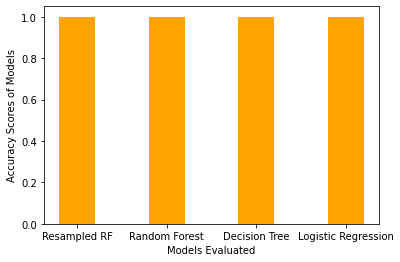

In [ ]:
## Comparison Plotting

accuracy_data = {
                  "Resampled RF": accuracy_score(test_Y2, predictions_resampled.round()),
                  "Random Forest": accuracy_score(test_Y, predictions_rf.round()),
                  "Decision Tree": accuracy_score(test_Y, predictions_dt.round()),
                  "Logistic Regression": accuracy_score(test_Y, predictions_lr.round())
                }
model_names = list(accuracy_data.keys())
model_accuracy_values = list(accuracy_data.values())

plt.bar(model_names, model_accuracy_values, width=0.4, color="orange")
plt.xlabel("Models Evaluated")
plt.ylabel("Accuracy Scores of Models")
plt.show()